In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(10))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
# заменим названия столбцов на более понятные
stud_math.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_education', 'father_education', 'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 'school_supp', 'family_supp', 'paid', 'activities', 'nursery', 'study_time_gran', 'higher', 'internet', 'romantic', 'family_relations', 'free_time', 'go_out','health','absences','exam_score']





In [4]:
display(stud_math.head(15))
stud_math.info()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_supp,family_supp,paid,activities,nursery,study_time_gran,higher,internet,romantic,family_relations,free_time,go_out,health,absences,exam_score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school            395 non-null    object 
 1   sex               395 non-null    object 
 2   age               395 non-null    int64  
 3   address           378 non-null    object 
 4   family_size       368 non-null    object 
 5   parents_status    350 non-null    object 
 6   mother_education  392 non-null    float64
 7   father_education  371 non-null    float64
 8   mother_job        376 non-null    object 
 9   father_job        359 non-null    object 
 10  reason            378 non-null    object 
 11  guardian          364 non-null    object 
 12  travel_time       367 non-null    float64
 13  study_time        388 non-null    float64
 14  failures          373 non-null    float64
 15  school_supp       386 non-null    object 
 16  family_supp       356 non-null    object 
 1

у нас всего 30 столбцов. первые 3 (школа, пол и возраст) заполнены полностью, в остальных есть пустые значения

In [5]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


видим, что большая часть учеников из одной школы

In [6]:
display(pd.DataFrame(stud_math.sex.value_counts()))


,sex
F,208
M,187


практически одинаковое распределение по полу, девочек немного больше

In [7]:
display(pd.DataFrame(stud_math.age.value_counts()))

stud_math.age.describe()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [16]:
median = stud_math.age.median()
IQR = stud_math.age.quantile(0.75) - stud_math.age.quantile(0.25)
perc25 = stud_math.age.quantile(0.25)
perc75 = stud_math.age.quantile(0.75)


25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


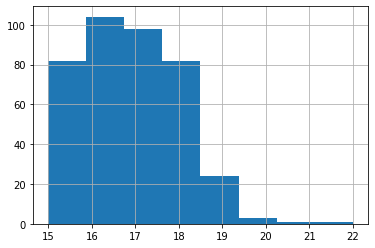

In [94]:
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.age.hist(bins = 8)


Основное распределение между 16 и 18 годами. есть один выброс - 22 года, но по условию - 22 года выбросом не является. 

In [8]:
display(pd.DataFrame(stud_math.school_supp.value_counts()))
stud_math.loc[:, ['school_supp']].info()


,school_supp
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_supp  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Видим, что есть пустые значения. заполним их наиболее часто встречающимся значением 'no'

In [9]:
stud_math.school_supp = stud_math.school_supp.apply(lambda x: 'no' if pd.isnull(x) else x)

In [10]:
display(pd.DataFrame(stud_math.school_supp.value_counts()))
stud_math.loc[:, ['school_supp']].info()

,school_supp
no,344
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_supp  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


посмотрим столбец Адрес. видим так же пустые значения. заполним их встречающимся чаще всего значением 'U'

In [11]:
display(pd.DataFrame(stud_math.address.value_counts()))
stud_math.loc[:, ['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [12]:
stud_math.address = stud_math.address.apply(lambda x: 'U' if pd.isnull(x) else x)

In [13]:
display(pd.DataFrame(stud_math.address.value_counts()))
stud_math.loc[:, ['address']].info()

,address
U,312
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


перейдем к следующему столбцу Размер семьи

In [14]:
display(pd.DataFrame(stud_math.family_size.value_counts()))
stud_math.loc[:, ['family_size']].info()

,family_size
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_size  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


слишком много пустых значений, ничем пока заполнять их не будем.

следующий столбец - статус родителей. тут тоже много пропусков - заполнять ничем не будем

In [15]:
display(pd.DataFrame(stud_math.parents_status.value_counts()))
stud_math.loc[:, ['parents_status']].info()

,parents_status
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   parents_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


следующий столбец - образование матери. всего 3 пустых значения, заполним их медианным значением

In [16]:
display(pd.DataFrame(stud_math.mother_education.value_counts()))
stud_math.loc[:, ['mother_education']].info()

,mother_education
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mother_education  392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [17]:
m_e_fill = stud_math.mother_education.median()

In [18]:
stud_math.mother_education = stud_math.mother_education.apply(lambda x: m_e_fill if pd.isnull(x) else x)

In [19]:
display(pd.DataFrame(stud_math.mother_education.value_counts()))
stud_math.loc[:, ['mother_education']].info()

,mother_education
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mother_education  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


аналогично посмотрим про образование отца

In [20]:
display(pd.DataFrame(stud_math.father_education.value_counts()))
stud_math.loc[:, ['father_education']].info()

,father_education
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   father_education  371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


видим странное значение 40. похоже, что это ошибка при заведении и должно быть 4. заменим.

In [21]:
stud_math.loc[11,['father_education']] = 4

In [22]:
display(pd.DataFrame(stud_math.father_education.value_counts()))

,father_education
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


все оставшиеся пропуски заменим на медианное значение

In [23]:
f_e_fill = stud_math.father_education.median()
stud_math.father_education = stud_math.father_education.apply(lambda x: f_e_fill if pd.isnull(x) else x)

In [24]:
display(pd.DataFrame(stud_math.father_education.value_counts()))
stud_math.loc[:, ['father_education']].info()

,father_education
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   father_education  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


рассмотрим работу родителей

In [25]:
display(pd.DataFrame(stud_math.mother_job.value_counts()))
stud_math.loc[:, ['mother_job']].info()

,mother_job
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mother_job  376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [26]:
display(pd.DataFrame(stud_math.father_job.value_counts()))
stud_math.loc[:, ['father_job']].info()

,father_job
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   father_job  359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


заменим пропуски на Other - наиболее часто встречающееся значение

In [27]:
stud_math.mother_job = stud_math.mother_job.apply(lambda x: 'other' if pd.isnull(x) else x)
stud_math.father_job = stud_math.father_job.apply(lambda x: 'other' if pd.isnull(x) else x)

рассмотрим столбец Reason, причина выбора школы

In [28]:
display(pd.DataFrame(stud_math.reason.value_counts()))
stud_math.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


все пустые значения заменим на Other

In [29]:
stud_math.reason = stud_math.reason.apply(lambda x: 'other' if pd.isnull(x) else x)

рассмотрим столбец guardian, опекун ученика

In [30]:
display(pd.DataFrame(stud_math.guardian.value_counts()))
stud_math.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


заменим все пропущенные значения на mother, как наиболее часто встречающееся

In [31]:
stud_math.guardian = stud_math.guardian.apply(lambda x: 'mother' if pd.isnull(x) else x)

следующие столбцы: travel_time,	study_time,	failures

In [32]:
display(pd.DataFrame(stud_math.travel_time.value_counts()))
stud_math.loc[:, ['travel_time']].info()

,travel_time
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


заменим все пропуски на медианное значение


In [33]:
t_t_fill = stud_math.travel_time.median()
stud_math.travel_time = stud_math.travel_time.apply(lambda x: t_t_fill if pd.isnull(x) else x)

аналогично посмотрим study_time и failures

In [34]:
display(pd.DataFrame(stud_math.study_time.value_counts()))
stud_math.loc[:, ['study_time']].info()

,study_time
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [35]:
s_t_fill = stud_math.study_time.median()
stud_math.study_time = stud_math.study_time.apply(lambda x: s_t_fill if pd.isnull(x) else x)

In [36]:
display(pd.DataFrame(stud_math.failures.value_counts()))
stud_math.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [37]:
f_fill = stud_math.failures.median()
stud_math.failures = stud_math.failures.apply(lambda x: f_fill if pd.isnull(x) else x)

далее family_supp,  paid,  activities

In [38]:
display(pd.DataFrame(stud_math.family_supp.value_counts()))
stud_math.loc[:, ['family_supp']].info()

,family_supp
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_supp  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [39]:
display(pd.DataFrame(stud_math.paid.value_counts()))
stud_math.loc[:, ['paid']].info()

,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [40]:
display(pd.DataFrame(stud_math.activities.value_counts()))
stud_math.loc[:, ['activities']].info()

,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [41]:
stud_math.activities = stud_math.activities.apply(lambda x: 'yes' if pd.isnull(x) else x)

In [166]:
stud_math.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_supp,family_supp,paid,activities,nursery,study_time_gran,higher,internet,romantic,family_relations,free_time,go_out,health,absences,exam_score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [42]:
display(pd.DataFrame(stud_math.nursery.value_counts()))
stud_math.loc[:, ['nursery']].info()

,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [43]:
stud_math.nursery = stud_math.nursery.apply(lambda x: 'yes' if pd.isnull(x) else x)

столобец study_time_gran полностью дублирует столбец study_time умноженный на -3. удалим его

In [44]:
stud_math.drop(['study_time_gran'], inplace = True, axis = 1)

In [45]:
stud_math.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_supp,family_supp,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,exam_score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


идем дальше: higher, internet, romantic, family_relations

In [47]:
display(pd.DataFrame(stud_math.higher.value_counts()))
stud_math.loc[:, ['higher']].info()

,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [48]:
stud_math.higher = stud_math.higher.apply(lambda x: 'yes' if pd.isnull(x) else x)

In [49]:
display(pd.DataFrame(stud_math.internet.value_counts()))
stud_math.loc[:, ['internet']].info()

,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [50]:
display(pd.DataFrame(stud_math.romantic.value_counts()))
stud_math.loc[:, ['romantic']].info()

,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [177]:
display(pd.DataFrame(stud_math.family_relations.value_counts()))
stud_math.loc[:, ['family_relations']].info()

,family_relations
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   family_relations  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


видим одну строку с значением -1, вероятно это ошибка при заведении. заменим это значение на 1

In [51]:
in_del = stud_math[stud_math.family_relations==-1].index.tolist()
stud_math.loc[in_del,['family_relations']] = 1

In [187]:
stud_math.drop(in_del, axis=0, inplace = True)

In [52]:
display(pd.DataFrame(stud_math.family_relations.value_counts()))
stud_math.loc[:, ['family_relations']].info()

,family_relations
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   family_relations  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Все пустые значения заменим на медианное

In [53]:
fem_rel_med = stud_math.family_relations.median()
stud_math.family_relations = stud_math.family_relations.apply(lambda x: fem_rel_med if pd.isnull(x) else x)

рассмотрим дальше free_time, go_out, health, absences

In [55]:
display(pd.DataFrame(stud_math.free_time.value_counts()))
stud_math.loc[:, ['free_time']].info()

,free_time
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


заменим пропуски на медиану

In [56]:
f_t_med = stud_math.free_time.median()
stud_math.free_time = stud_math.free_time.apply(lambda x: f_t_med if pd.isnull(x) else x)

In [57]:
display(pd.DataFrame(stud_math.go_out.value_counts()))
stud_math.loc[:, ['go_out']].info()

,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


заменим пропуски на медиану

In [58]:
go_out_med = stud_math.go_out.median()
stud_math.go_out = stud_math.go_out.apply(lambda x: go_out_med if pd.isnull(x) else x)

In [59]:
display(pd.DataFrame(stud_math.go_out.value_counts()))

,go_out
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


In [60]:
display(pd.DataFrame(stud_math.health.value_counts()))
stud_math.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


заменим пропуски на медиану

In [61]:
health_med = stud_math.health.median()
stud_math.health = stud_math.health.apply(lambda x: health_med if pd.isnull(x) else x)

In [62]:
display(pd.DataFrame(stud_math.health.value_counts()))

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


In [63]:
display(pd.DataFrame(stud_math.absences.value_counts()))
stud_math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


найдем медианное значение и проверим есть ли выбросы

In [65]:
stud_math.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [85]:
median_abs = stud_math.absences.median()
IQR_abs = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25_abs = stud_math.absences.quantile(0.25)
perc75_abs = stud_math.absences.quantile(0.75)

заменим все пустые значение на медианное

In [88]:
stud_math.absences = stud_math.absences.apply(lambda x: median_abs if pd.isnull(x) else x)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


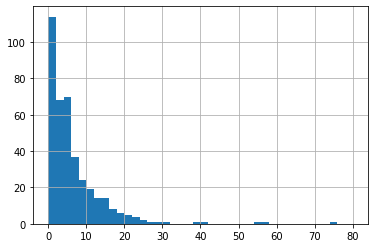

In [89]:
print('25-й перцентиль: {},'.format(perc25_abs), '75-й перцентиль: {},'.format(perc75_abs)
      , "IQR: {}, ".format(IQR_abs),"Границы выбросов: [{f_abs}, {l_abs}]."
      .format(f_abs=perc25_abs - 1.5*IQR_abs, l_abs=perc75_abs + 1.5*IQR_abs))
stud_math.absences.hist(bins=40, range = (0, 80))

In [90]:
stud_math.loc[stud_math.absences>30]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_supp,family_supp,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,exam_score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,no,yes,yes,4.0,1.0,1.0,5.0,75.0,45.0
307,GP,M,19,U,GT3,NaN,4.0,4.0,teacher,services,reputation,other,2.0,1.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,3.0,4.0,4.0,38.0,40.0
315,GP,F,19,R,GT3,T,2.0,3.0,other,other,reputation,other,1.0,3.0,1.0,no,no,no,no,yes,yes,yes,yes,4.0,1.0,2.0,3.0,40.0,55.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


На гистограмме видно, что основное распределение значений от 0 до 30. не смотря на то, что верхняя граница выбросов - 20, ученик действительно мог пропустить более 30 занятий в год. все, что больше, удалим.

In [91]:
stud_math = stud_math.loc[stud_math.absences <= 30]

In [92]:
display(pd.DataFrame(stud_math.exam_score.value_counts()))
stud_math.loc[:, ['exam_score']].info()

,exam_score
50.0,54
55.0,44
0.0,37
75.0,33
65.0,31
60.0,31
40.0,29
70.0,27
45.0,25
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


найдем медиану и заменим все пропуски

In [94]:
exam_score_median = stud_math.exam_score.median()

In [95]:
stud_math.exam_score = stud_math.exam_score.apply(lambda x: exam_score_median if pd.isnull(x) else x)

In [96]:
display(pd.DataFrame(stud_math.exam_score.value_counts()))
stud_math.loc[:, ['exam_score']].info()

,exam_score
50.0,54
55.0,50
0.0,37
75.0,33
65.0,31
60.0,31
40.0,29
70.0,27
45.0,25
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  388 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [97]:
stud_math.exam_score.describe()

count    388.000000
mean      52.306701
std       22.866905
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: exam_score, dtype: float64

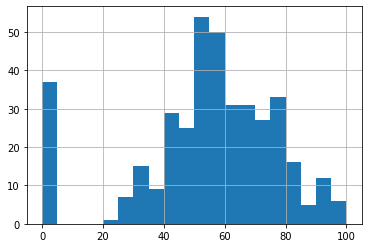

In [104]:
stud_math.exam_score.hist(bins=20, range = (0, 100))

In [105]:
stud_math.corr()

,age,mother_education,father_education,travel_time,study_time,failures,family_relations,free_time,go_out,health,absences,exam_score
age,1.000000,-0.164035,-0.162200,0.085954,-0.014948,0.210496,0.054435,0.032739,0.136230,-0.068280,0.147514,-0.147150
mother_education,-0.164035,1.000000,0.594321,-0.167682,0.083189,-0.245518,-0.016703,0.027830,0.059507,-0.053532,0.111991,0.211259
father_education,-0.162200,0.594321,1.000000,-0.121539,0.010992,-0.265286,-0.022041,-0.026461,0.039382,0.008623,0.011228,0.123447
travel_time,0.085954,-0.167682,-0.121539,1.000000,-0.091021,0.052281,-0.019115,-0.008935,0.051542,-0.050465,-0.003124,-0.052508
study_time,-0.014948,0.083189,0.010992,-0.091021,1.000000,-0.168624,0.038213,-0.115705,-0.046723,-0.072280,-0.088334,0.113189
failures,0.210496,-0.245518,-0.265286,0.052281,-0.168624,1.000000,-0.026150,0.089368,0.107314,0.075279,0.090610,-0.327355
family_relations,0.054435,-0.016703,-0.022041,-0.019115,0.038213,-0.026150,1.000000,0.164506,0.062981,0.089658,-0.091046,0.065285
free_time,0.032739,0.027830,-0.026461,-0.008935,-0.115705,0.089368,0.164506,1.000000,0.279339,0.063954,0.020079,0.019192
go_out,0.136230,0.059507,0.039382,0.051542,-0.046723,0.107314,0.062981,0.279339,1.000000,-0.013936,0.113939,-0.120250
health,-0.068280,-0.053532,0.008623,-0.050465,-0.072280,0.075279,0.089658,0.063954,-0.013936,1.000000,-0.045598,-0.073332


1) Сильная кореляция между образованием родителей. можно оставить только один столбец для построения модели, например, mother_education

2) так же мы видим, что у mother_education есть обратная корреляция с failures и практически такое же значение, только со знаком + у exam_score. Можно предположить, что матери с вышсшим образованием больше занимаются с детьми и поэтому у детей меньше неудач и выше оценки за экзамен.

3) так же мы видим корреляцию между столбцом exam_score и study_time, что очень логично, чем больше времени посвещаешь учебе, тем выше оценки. 

4) обратная корреляция между exam_score и go_out. То есть чем меньше ребенок гуляет с друзьями, тем выше оценки. Что странно, между go_out и study_time сильной корреляции нет.

5) Есть корреляция между go_out и absence и go_out и failures. То есть частые встречи с друзьями влияют на пропуски занятий и количество неудач.

6) Есть обратная корреляция между failures и exam_score. 

7) так же видим зависимость между age, failures, go_out, absences и exam_score. То есть, чем старше ученик, тем чаще он встречается с друзьями, тем чаще отсутствует на занятиях и соответсвенно ниже оченка за экзамен.

Travel_time коррелирует только с образованием родителей. Возможно, это связано с тем, что чем лучше образование, тем выше доходи и можно позволить себе жилье ближе к центру или личный транспорт, который так же экономит время на дорогу.
health - не коррелирует ни с одним показателем

Посколько сильная корреляция (больше 0,5) только между образованием родителей, то убираем только father_education. Все остальные столбцы оставляем.

Посмотрим теперь на номинативные переменные.


In [124]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'exam_score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'exam_score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


In [128]:
for col in ['school','sex', 'address', 'family_size','parents_status', 'mother_job', 'reason', 'guardian', 'school_supp','family_supp','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [130]:
def get_boxplot(column):
    fig, ax = plt.subplots()
    sns.boxplot(x=column, y='exam_score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

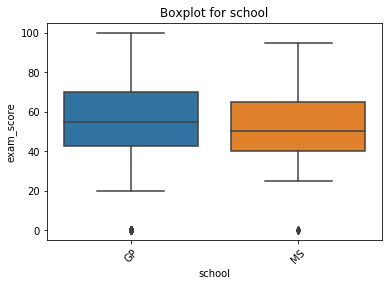

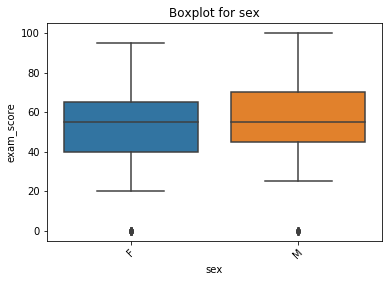

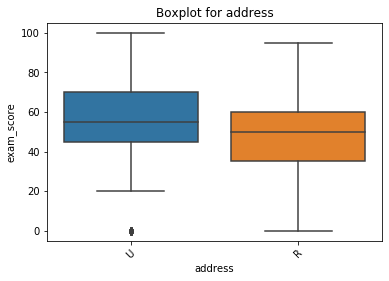

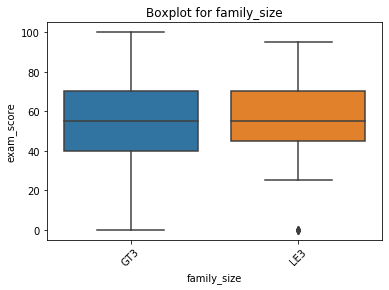

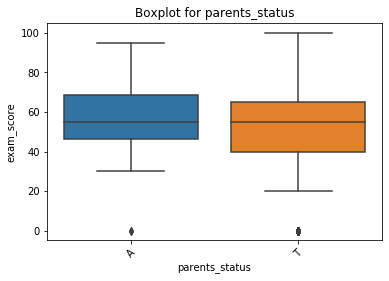

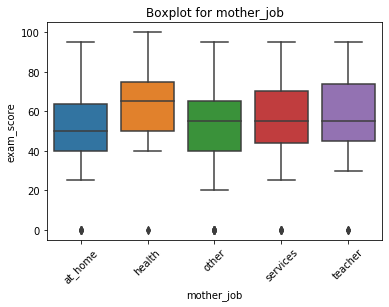

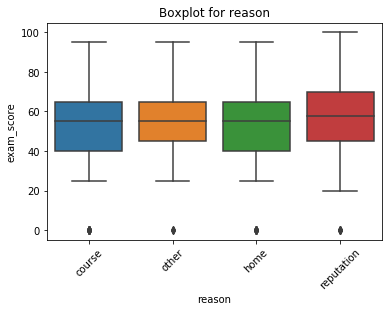

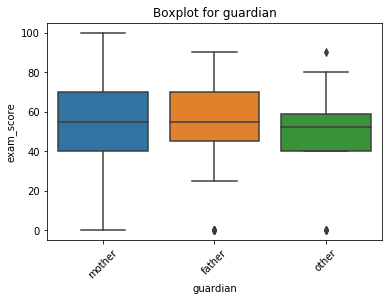

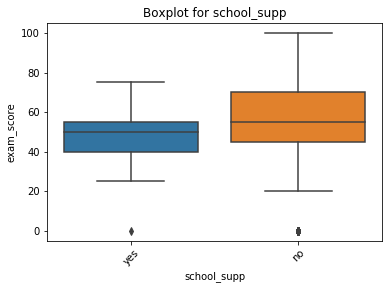

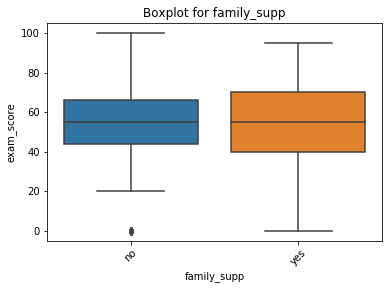

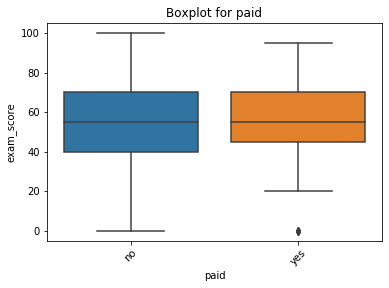

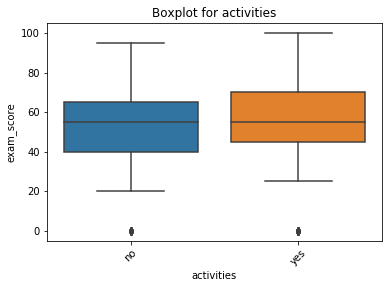

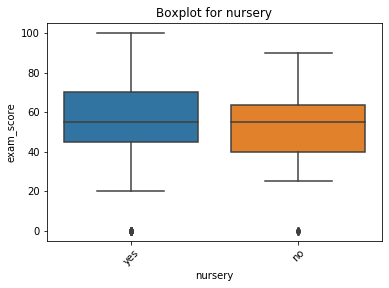

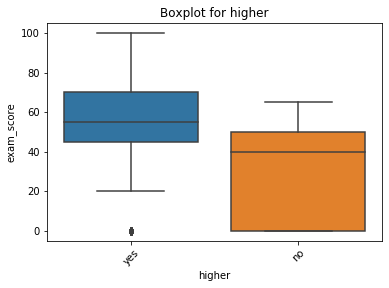

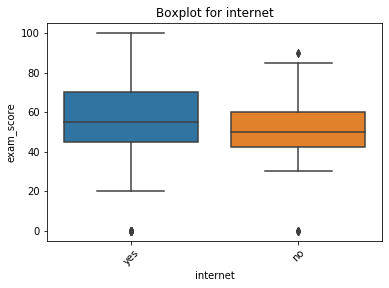

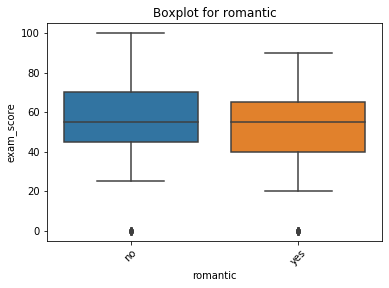

In [131]:
for col in ['school','sex', 'address', 'family_size','parents_status', 'mother_job', 'reason', 'guardian', 'school_supp','family_supp','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

При помощи теста Стьюдента выявили, что наиболее значимыми при построении модели будут следующие столбцы: sex, address, mother_job, higher и romantic.
